# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [41]:
pip install setup tools

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement setup (from versions: none)
ERROR: No matching distribution found for setup


In [42]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [44]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [45]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [46]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [47]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding= 'same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [48]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding= 'same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [49]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding= 'same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [50]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding= 'same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [51]:
cnn.add(tf.keras.layers.Flatten())

In [52]:
cnn.add(tf.keras.layers.Dense(units=1024,activation='relu'))

In [53]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [54]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [55]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])


In [56]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 38)             │        38,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,989,446 (68.62 MB)

 Trainable params: 17,989,446 (68.62 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 912s 414ms/step - accuracy: 0.5417 - loss: 1.6700 - val_accuracy: 0.8959 - val_loss: 0.3421
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 908s 413ms/step - accuracy: 0.9005 - loss: 0.3180 - val_accuracy: 0.9468 - val_loss: 0.1611
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2314s 1s/step - accuracy: 0.9411 - loss: 0.1769 - val_accuracy: 0.9504 - val_loss: 0.1505
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2075s 944ms/step - accuracy: 0.9652 - loss: 0.1065 - val_accuracy: 0.9604 - val_loss: 0.1275
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 892s 406ms/step - accuracy: 0.9738 - loss: 0.0818 - val_accuracy: 0.9593 - val_loss: 0.1409
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 901s 410ms/step - accuracy: 0.9796 - loss: 0.0623 - val_accuracy: 0.9679 - val_loss: 0.1032
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 908s 413ms/step - accuracy: 0.9819 - loss: 0.0551 - val_accuracy: 0.9700 - val_loss: 0.0994
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 911s 415ms/step - acc

## Evaluating Model

In [58]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 257s 117ms/step - accuracy: 0.9957 - loss: 0.0133
Training accuracy: 0.996016800403595


In [59]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 59s 106ms/step - accuracy: 0.9649 - loss: 0.1257
Validation accuracy: 0.9661962389945984


### Saving Model

In [60]:
cnn.save('trained_plant_disease_model.keras')

In [61]:
training_history.history #Return Dictionary of history

{'accuracy': [0.7224695682525635,
  0.9145742654800415,
  0.9493420720100403,
  0.9670389294624329,
  0.974791944026947,
  0.9802688956260681,
  0.9827868342399597,
  0.9865566492080688,
  0.9883490800857544,
  0.98866206407547],
 'loss': [0.9539082050323486,
  0.270211398601532,
  0.15390647947788239,
  0.09971760213375092,
  0.0755525678396225,
  0.06045761704444885,
  0.051746293902397156,
  0.042599987238645554,
  0.03728535398840904,
  0.03533252701163292],
 'val_accuracy': [0.895857036113739,
  0.9468472599983215,
  0.9503756165504456,
  0.9604484438896179,
  0.9592533707618713,
  0.9679034948348999,
  0.9700090885162354,
  0.9734236001968384,
  0.9678465723991394,
  0.9661962389945984],
 'val_loss': [0.3421074450016022,
  0.1611054390668869,
  0.15051981806755066,
  0.12754124402999878,
  0.14093782007694244,
  0.10318194329738617,
  0.09935227781534195,
  0.08997414261102676,
  0.1142653375864029,
  0.12100204080343246]}

In [62]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [63]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

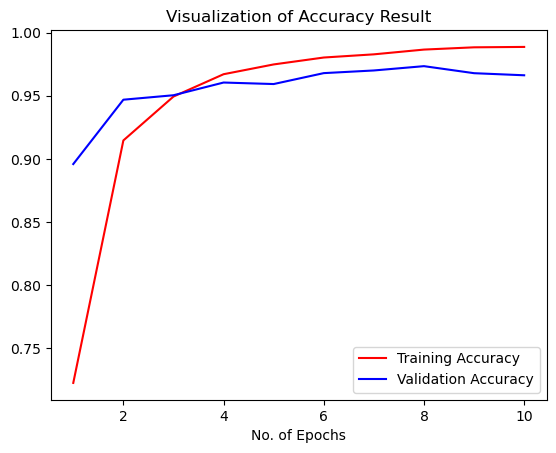

In [64]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [65]:
class_name = validation_set.class_names

In [66]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [67]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 174s 10ms/step


In [68]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [69]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [70]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [71]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [72]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.93      0.96       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.96      0.96      0.96       502
                               Blueberry___healthy       0.93      1.00      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.83      0.90       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.86      0.99      0.

### Confusion Matrix Visualization

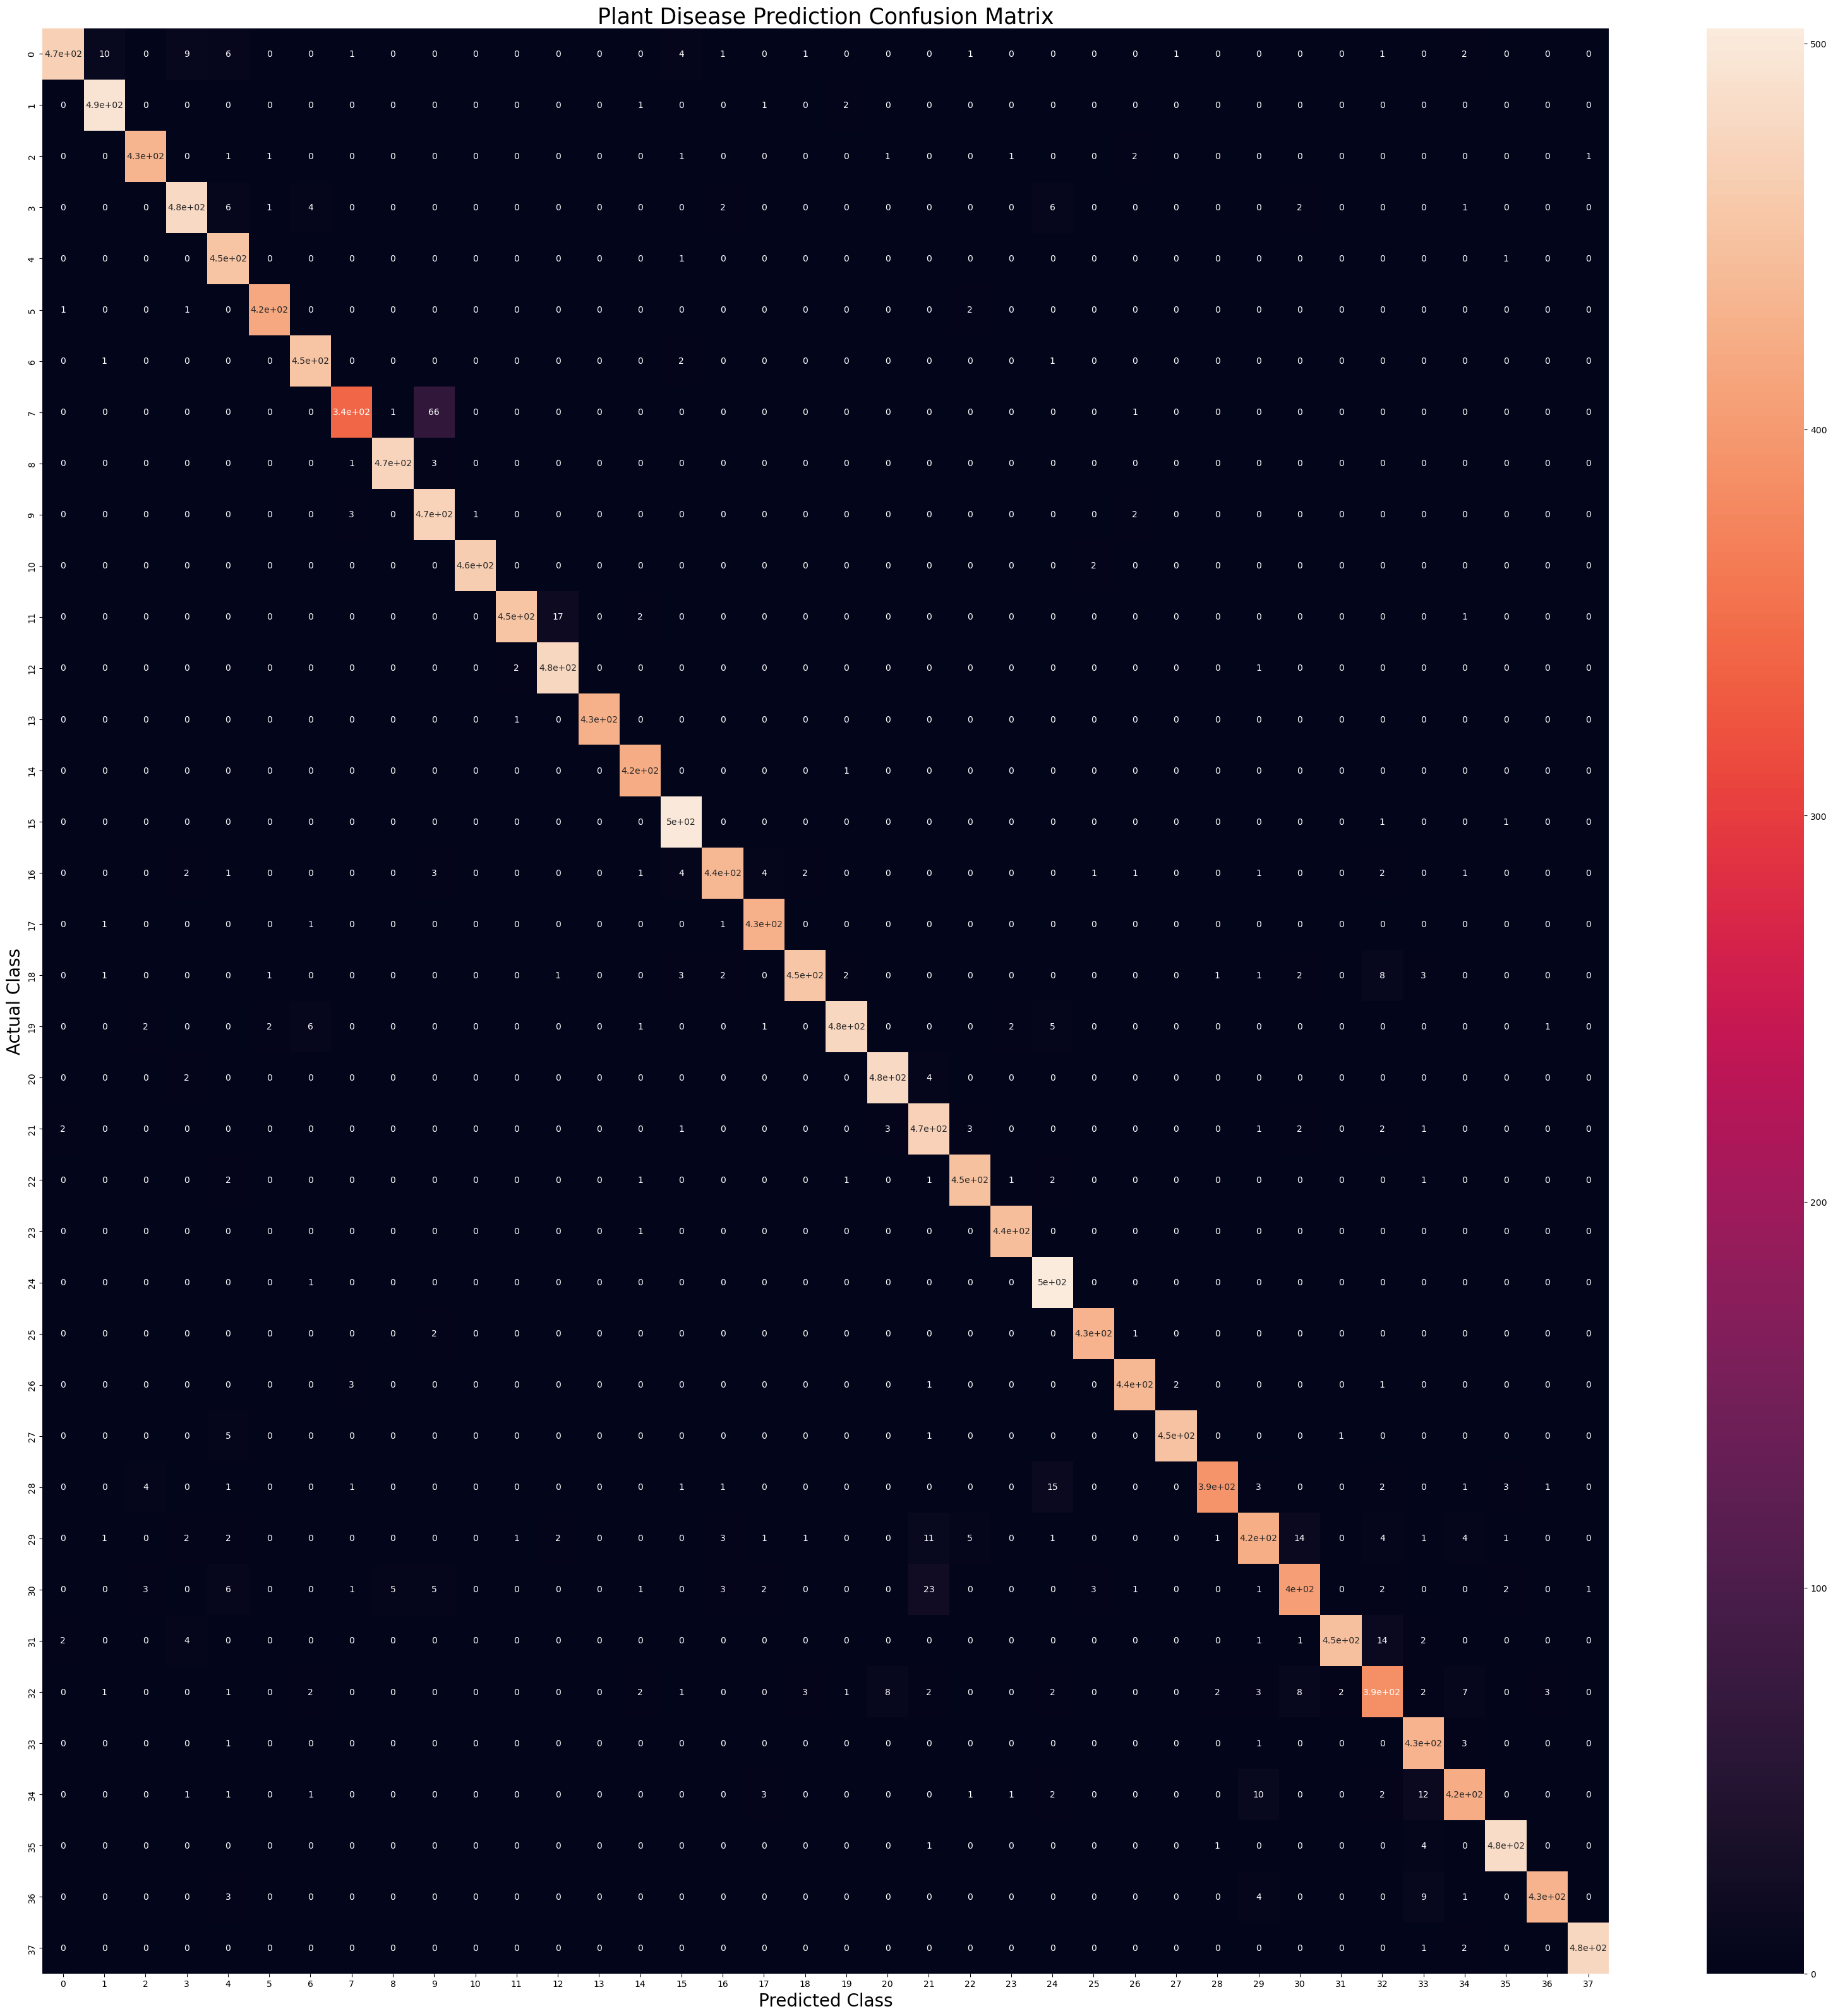

In [73]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()